# Error Analysis With Count 2

- Author: Wen Xin
- Description: This file is used to do error analysis with count, investigating whether there is any difference with count in just positive and negative

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('error_analysis_data_set.csv')

In [30]:
positive=data[(data['label']==1)]
positive.head()

,user_id,voting,order_sd,active_days,lastgap,avg_gap,min_gap,max_gap,w1_total_orders,w2_total_orders,...,dummy_like_num,dummy_has_kitchen_info,dummy_staple_price,comment_perc,pca_1,pca_2,pca_3,pca_4,pca_5,cluster
0,100372450,1,0.281963,6,10.0,10.200000,3.0,21.0,1.0,1.0,...,1.0,1,1,0.000000,3.409103,-0.149396,1.754331,-3.435309,1.308357,0
1,101421318,0,0.119523,1,100.0,100.000000,100.0,100.0,0.0,0.0,...,0.0,0,0,0.000000,-3.461943,-4.122877,-4.930299,3.696131,1.864631,3
5,100284278,1,0.501757,16,2.0,3.933333,1.0,17.0,4.0,3.0,...,0.0,0,0,0.111111,7.842219,4.354197,1.753451,1.826004,0.859087,2
7,100421639,1,0.414289,7,22.0,8.166667,1.0,22.0,0.0,1.0,...,1.0,1,1,0.000000,-2.991416,16.460736,0.922974,-0.064788,-2.176470,1
9,101394738,0,0.265707,2,100.0,6.000000,6.0,6.0,0.0,0.0,...,1.0,1,1,0.333333,-0.152718,-2.550987,-2.804753,-3.062362,-0.762872,0


In [31]:
negative=data[(data['label']==0)]
negative.head()

,user_id,voting,order_sd,active_days,lastgap,avg_gap,min_gap,max_gap,w1_total_orders,w2_total_orders,...,dummy_like_num,dummy_has_kitchen_info,dummy_staple_price,comment_perc,pca_1,pca_2,pca_3,pca_4,pca_5,cluster
2,101268720,0,0.302166,7,4.0,7.833333,1.0,36.0,4.0,1.0,...,1.0,1,1,0.0,4.748548,1.475891,1.883121,1.038071,-3.252782,0
3,100495757,0,0.119523,1,100.0,100.000000,100.0,100.0,0.0,1.0,...,1.0,1,1,0.0,-4.066705,-4.468919,1.303573,0.074750,3.000592,3
4,100372886,0,0.119523,1,100.0,100.000000,100.0,100.0,1.0,0.0,...,1.0,1,1,0.0,-3.322859,-3.956791,4.966979,2.133271,0.883639,3
6,101400473,0,0.119523,1,100.0,100.000000,100.0,100.0,0.0,0.0,...,1.0,1,1,0.0,-4.664019,-4.372053,-0.214569,3.564512,-3.649648,3
8,101073416,0,0.310279,4,14.0,15.666667,14.0,19.0,1.0,0.0,...,1.0,1,1,0.0,3.798929,0.954570,2.513294,-2.052844,-0.021804,0


In [32]:
positive=positive['user_id']
negative=negative['user_id']

In [33]:
orders=pd.read_csv('training_coupon_set_2.csv')

In [34]:
orders.head()

,user_id,04/04/2016count,04/05/2016count,04/06/2016count,04/07/2016count,04/08/2016count,04/09/2016count,04/10/2016count,04/11/2016count,04/12/2016count,...,06/17/2016count,06/18/2016count,06/19/2016count,06/20/2016count,06/21/2016count,06/22/2016count,06/23/2016count,06/24/2016count,06/25/2016count,06/26/2016count
0,100002020,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100002023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100002024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100002033,0.0,1.0,1.0,3.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100002034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
positive_orders=pd.merge(pd.DataFrame(positive),orders)
positive_orders.head()

,user_id,04/04/2016count,04/05/2016count,04/06/2016count,04/07/2016count,04/08/2016count,04/09/2016count,04/10/2016count,04/11/2016count,04/12/2016count,...,06/17/2016count,06/18/2016count,06/19/2016count,06/20/2016count,06/21/2016count,06/22/2016count,06/23/2016count,06/24/2016count,06/25/2016count,06/26/2016count
0,100372450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,101421318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100284278,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,100421639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,101394738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
negative_orders=pd.merge(pd.DataFrame(negative),orders)
negative_orders.head()

,user_id,04/04/2016count,04/05/2016count,04/06/2016count,04/07/2016count,04/08/2016count,04/09/2016count,04/10/2016count,04/11/2016count,04/12/2016count,...,06/17/2016count,06/18/2016count,06/19/2016count,06/20/2016count,06/21/2016count,06/22/2016count,06/23/2016count,06/24/2016count,06/25/2016count,06/26/2016count
0,101268720,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100495757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100372886,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,101400473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,101073416,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
all_columns=[
  '04/04/2016count',
 '04/05/2016count',
 '04/06/2016count',
 '04/07/2016count',
 '04/08/2016count',
 '04/09/2016count',
 '04/10/2016count',
 '04/11/2016count',
 '04/12/2016count',
 '04/13/2016count',
 '04/14/2016count',
 '04/15/2016count',
 '04/16/2016count',
 '04/17/2016count',
 '04/18/2016count',
 '04/19/2016count',
 '04/20/2016count',
 '04/21/2016count',
 '04/22/2016count',
 '04/23/2016count',
 '04/24/2016count',
 '04/25/2016count',
 '04/26/2016count',
 '04/27/2016count',
 '04/28/2016count',
 '04/29/2016count',
 '04/30/2016count',
 '05/01/2016count',
 '05/02/2016count',
 '05/03/2016count',
 '05/04/2016count',
 '05/05/2016count',
 '05/06/2016count',
 '05/07/2016count',
 '05/08/2016count',
 '05/09/2016count',
 '05/10/2016count',
 '05/11/2016count',
 '05/12/2016count',
 '05/13/2016count',
 '05/14/2016count',
 '05/15/2016count',
 '05/16/2016count',
 '05/17/2016count',
 '05/18/2016count',
 '05/19/2016count',
 '05/20/2016count',
 '05/21/2016count',
 '05/22/2016count',
 '05/23/2016count',
 '05/24/2016count',
 '05/25/2016count',
 '05/26/2016count',
 '05/27/2016count',
 '05/28/2016count',
 '05/29/2016count',
 '05/30/2016count',
 '05/31/2016count',
 '06/01/2016count',
 '06/02/2016count',
 '06/03/2016count',
 '06/04/2016count',
 '06/05/2016count',
 '06/06/2016count',
 '06/07/2016count',
 '06/08/2016count',
 '06/09/2016count',
 '06/10/2016count',
 '06/11/2016count',
 '06/12/2016count',
 '06/13/2016count',
 '06/14/2016count',
 '06/15/2016count',
 '06/16/2016count',
 '06/17/2016count',
 '06/18/2016count',
 '06/19/2016count',
 '06/20/2016count',
 '06/21/2016count',
 '06/22/2016count',
 '06/23/2016count',
 '06/24/2016count',
 '06/25/2016count',
 '06/26/2016count']

In [40]:
positive_perc=[]
print("Positive Orders:")
print("")
for c in all_columns:
    print (c,np.sum(np.where(positive_orders[c]>0,1,0))/len(positive_orders[c])*100,"%")
    positive_perc.append(np.sum(np.where(positive_orders[c]>0,1,0))/len(positive_orders[c])*100)

Positive Orders:

04/04/2016count 5.95793364428408 %
04/05/2016count 14.107190002640149 %
04/06/2016count 10.076564287600105 %
04/07/2016count 10.454985479186835 %
04/08/2016count 9.99735985215172 %
04/09/2016count 7.28680806125143 %
04/10/2016count 7.242805597113438 %
04/11/2016count 13.051130863328348 %
04/12/2016count 20.619554695062924 %
04/13/2016count 10.683798292704392 %
04/14/2016count 11.361436240429464 %
04/15/2016count 11.616650532429816 %
04/16/2016count 8.202059315321659 %
04/17/2016count 8.272463257942444 %
04/18/2016count 11.933468274223356 %
04/19/2016count 18.956261550646836 %
04/20/2016count 11.247029833670686 %
04/21/2016count 12.831118542638386 %
04/22/2016count 11.458241661533046 %
04/23/2016count 9.240517468978263 %
04/24/2016count 9.68054211035818 %
04/25/2016count 13.737569303881017 %
04/26/2016count 18.55143888057731 %
04/27/2016count 15.128047170641556 %
04/28/2016count 14.820029921675616 %
04/29/2016count 11.291032297808677 %
04/30/2016count 6.793980462905923

In [41]:
negative_perc=[]
print("Negative Orders:")
print("")
for c in all_columns:
    print (c,np.sum(np.where(negative_orders[c]>0,1,0))/len(negative_orders[c])*100,"%")
    negative_perc.append(np.sum(np.where(negative_orders[c]>0,1,0))/len(negative_orders[c])*100)

Negative Orders:

04/04/2016count 2.5214751184834125 %
04/05/2016count 7.0941943127962075 %
04/06/2016count 4.150622037914692 %
04/07/2016count 4.443127962085308 %
04/08/2016count 4.265402843601896 %
04/09/2016count 2.925059241706161 %
04/10/2016count 2.95468009478673 %
04/11/2016count 5.368779620853081 %
04/12/2016count 11.966824644549764 %
04/13/2016count 5.009626777251184 %
04/14/2016count 5.279917061611374 %
04/15/2016count 4.613447867298579 %
04/16/2016count 3.6396623222748814 %
04/17/2016count 3.243483412322275 %
04/18/2016count 4.691202606635072 %
04/19/2016count 9.767476303317535 %
04/20/2016count 5.035545023696683 %
04/21/2016count 5.1614336492890995 %
04/22/2016count 4.661581753554502 %
04/23/2016count 3.4730450236966823 %
04/24/2016count 3.587825829383886 %
04/25/2016count 5.287322274881516 %
04/26/2016count 9.830420616113745 %
04/27/2016count 6.146327014218009 %
04/28/2016count 6.090787914691943 %
04/29/2016count 4.117298578199052 %
04/30/2016count 2.3955864928909953 %
05/0

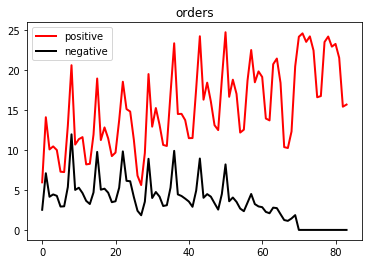

In [42]:
plt.title("orders")
plt.plot(positive_perc, color='red', linewidth=2, label='positive')
plt.plot(negative_perc, color='black', linewidth=2, label='negative')
plt.legend()